In [8]:
import sys
import os
import logging

msg_format = "%(asctime)s|%(levelname)s|%(filename)s:%(lineno)d| %(message)s"
date_format = "%d-%b-%y %H:%M:%S"
logging.basicConfig(level=logging.INFO, format=msg_format, datefmt=date_format, stream=sys.stdout)

pwd = os.getcwd()
module_path = f"{pwd}\..\src"
sys.path.insert(0, module_path)

from datetime import datetime, timedelta
import seaborn as sns
import matplotlib.pyplot as plt

from hostelprices.load_data import LoadData
from hostelprices.utils import Utils

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
city_list = Utils.fromConfig('city_selection')
date_from_list = Utils.fromConfig('date_selection')
duration_list = Utils.fromConfig('duration_selection')
max_pages = Utils.fromConfig('max_pages')

In [17]:
date_from_list

[datetime.date(2022, 11, 13)]

In [18]:
df_all = LoadData.loop(
    city_list=city_list, date_from_list=date_from_list, duration_list=duration_list, 
    max_pages=max_pages
    )

16-Oct-22 14:56:03|INFO|load_data.py:144| https://www.hostelworld.com/s?q=Lisbon,%20Portugal&country=Portugal&city=Lisbon&type=city&id=725&from=2022-11-13&to=2022-11-15&guests=1&page=1
16-Oct-22 14:56:03|INFO|logger.py:11| ====== WebDriver manager ======
16-Oct-22 14:56:04|INFO|logger.py:11| Get LATEST geckodriver version for 105.0 firefox


[WDM] - Downloading: 19.0kB [00:00, 9.86MB/s]                   


16-Oct-22 14:56:07|INFO|logger.py:11| Driver [C:\Users\fsgl1\.wdm\drivers\geckodriver\win64\0.32\geckodriver.exe] found in cache


In [19]:
len(df_all)
df_all = df_all[(df_all["price (EUR)"]<100) & (df_all["duration (days)"]==2)]

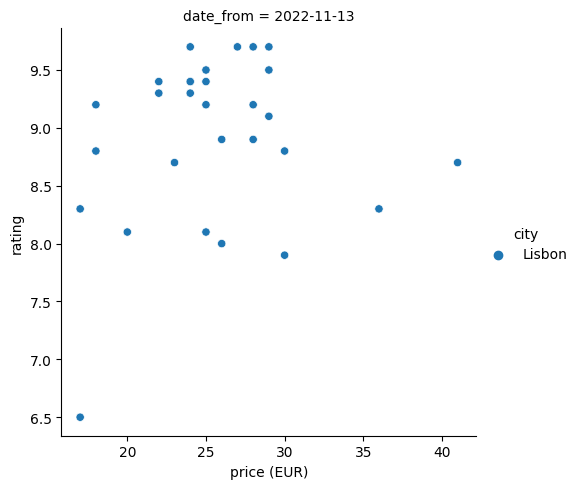

In [20]:
sns.relplot(
    data=df_all,    
    x='price (EUR)',
    y='rating',
    col='date_from',
    hue='city'
    )
plt.show()